In [1]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

In [41]:
def gridstart(N):
    X = np.linspace(0,10,10)
    Y = np.linspace(0,10,N)
    A = []
    for x in X:
        for y in Y:
            A.append([x,y])
    A = np.array(A)
    return A 

A = gridstart(35)
for i in range(len(A)):
    config = A[i]
    file = "Ea_"+str(config[0])+"-Eb_"+str(round(config[1],1))+".csv"
    #print(file)

In [27]:
file = "dat/Ea_8.9-Eb_6.5.csv"
df = pd.read_csv(file)
df.columns
tt = df['time'].to_numpy()

x_r = df['x_r'].to_numpy()
y_r = df['y_r'].to_numpy()

dx_r = df['dx_r'].to_numpy()
dy_r = df['dy_r'].to_numpy()
N = 11**2


tft = tt/3.82e7

y_r = y_r%(2*np.pi)
t = np.split(tt,N)
tf = np.split(tft,N)

x = np.split(x_r,N)
dx = np.split(dx_r,N)
y = np.split(y_r,N)

del df

E_x = np.linspace(0,np.max(x),100)
E_y = 8.9*E_x**2+1*6.5*E_x


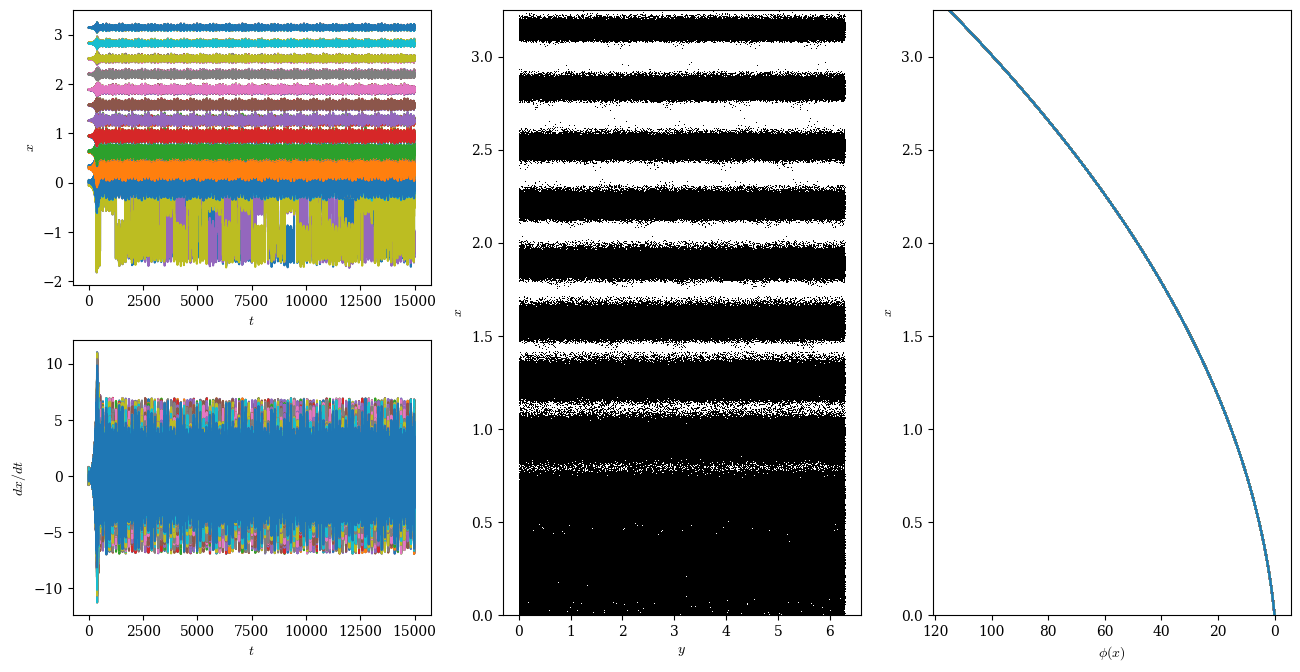

In [41]:
plt.rcParams["mathtext.fontset"] = "cm" # Fonte matemática pro latex
plt.rc('font', family='serif') # fonte tipo serif, p fica paredico com latex msm
plt.rc('text', usetex=False) # esse vc deixa True e for salvar em pdf e False se for p salvar png

fig = plt.figure()

gs = GridSpec(2, 3, figure=fig)
fig.tight_layout() # isso aq nsei bem qq faz mas ajuda a deixar menos espaço em branco
fig.set_size_inches(40*0.393, 20*0.393) # esse fatir 0.393 é p converter polegadas p cm """
#ax.plot(y,x,"k,")


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])


ax3 = fig.add_subplot(gs[:,1])
ax4 = fig.add_subplot(gs[:,2])


for j in range(N):
    ax1.plot(t[j],x[j])
    ax2.plot(t[j],dx[j])
    ax3.plot(y[j],x[j],"k,")
    ax4.plot(E_y,E_x)

ax4.invert_xaxis()
ax4.set_ylim(0,np.max(x))
ax3.set_ylim(0,np.max(x))

ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x$')

ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$dx/dt$')

ax3.set_xlabel(r'$y$')
ax3.set_ylabel(r'$x$')

ax4.set_xlabel(r'$\phi(x)$')
ax4.set_ylabel(r'$x$')

"""
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('phi(t)')
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('x(t)')
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('y(t)')
ax[0,1].set_xlabel('y')
ax[0,1].set_ylabel('x')
"""
plt.savefig("bbb.png",dpi=300, bbox_inches='tight')

